In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [35]:
def alpha_polynomial(staleness, a):
    return (1 / (1 + staleness)**a)

def alpha_exponential(staleness, a):
    return np.exp(-a * staleness)

def beta_polynomial(loss, b):
    return (1.5 - (1 / (1 + loss)**b))

def beta_exponential(loss, b):
    return 1 - np.exp(-b * loss)

In [36]:
def fedbuff_polynomial(staleness):
    return (1 / (1 + staleness)**0.5)

def fedbuff_hinge(staleness_vector, a, b):
    return [1 if staleness < b else 1 / (a * (staleness - b) + 1) for staleness in staleness_vector]


In [37]:
def weight_factor(scale, staleness, a, loss, b, alpha_type='polynomial', beta_type='polynomial'):
    if alpha_type == 'polynomial':
        alpha = alpha_polynomial(staleness, a)
    elif alpha_type == 'exponential':
        alpha = alpha_exponential(staleness, a)
    else:
        raise ValueError('Invalid alpha type')
    
    if beta_type == 'polynomial':
        beta = beta_polynomial(loss, b)
    elif beta_type == 'exponential':
        beta = beta_exponential(loss, b)
    else:
        raise ValueError('Invalid beta type')
    
    return (scale) * alpha + (1-scale) * beta # weight_factor range is [0, 1]
    

In [26]:
staleness_vec = np.linspace(0, 20, 21) # limit of staleness ??
loss_vec = np.linspace(0, 5, 21)  # limit of loss ??

# exact values are: scale 0.4, a_exp 0.25 and b_exp 0.1

In [27]:
weight_factor(scale=0.5, staleness=0, a=0.5, loss=loss_vec, b=0.5)

array([0.6       , 0.6527864 , 0.69175171, 0.72203553, 0.74644661,
       0.76666667, 0.78377223, 0.79848866, 0.81132487, 0.8226499 ,
       0.83273876, 0.84180111, 0.85      , 0.85746437, 0.86429774,
       0.87058427, 0.8763932 , 0.88178211, 0.88679928, 0.89148559,
       0.89587585])

In [28]:
# plt.figure(figsize=(6, 4))
# for s in staleness_vec:
#     plt.plot(loss_vec, weight_factor(scale=0.5, staleness=s, a=0.5, loss=loss_vec, b=0.5, alpha_type='polynomial'), label=f'staleness={s}')
# plt.xlabel('loss')
# plt.ylabel('weight factor')
# plt.legend()
# plt.title('Weight factor for different staleness values')
# plt.grid()
# plt.show()


In [29]:
weight_factor(scale=0.5, staleness=staleness_vec, a=0.5, loss=5, b=0.5)

array([0.89587585, 0.74942925, 0.68455099, 0.64587585, 0.61948265,
       0.6       , 0.58485809, 0.57265255, 0.56254252, 0.55398974,
       0.54663153, 0.54021342, 0.5345509 , 0.52950648, 0.5249753 ,
       0.52087585, 0.51714367, 0.51372698, 0.51058372, 0.50767925,
       0.5049848 ])

In [30]:
# plt.figure(figsize=(6, 4))
# for l in loss_vec:
#     plt.plot(staleness_vec, weight_factor(scale=0.5, staleness=staleness_vec, a=0.5, loss=l, b=0.5), label=f'loss={l}')
# plt.xlabel('staleness')
# plt.ylabel('weight factor')
# plt.legend()
# plt.title('Weight factor for different loss values')
# plt.grid()
# plt.show()

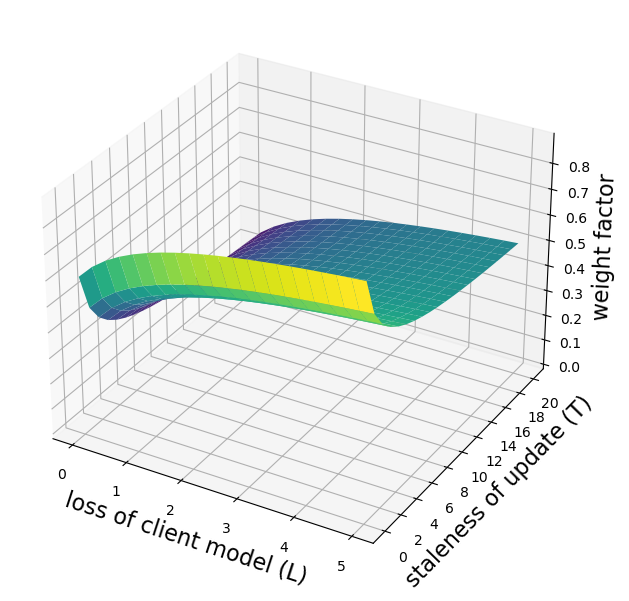

In [31]:
# loss on x axis, staleness on y axis
# weight factor as color
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(loss_vec, staleness_vec)
Z = weight_factor(scale=0.5, staleness=Y, a=0.5, loss=X, b=0.5)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('loss of client model (L)', fontsize=16)
ax.set_ylabel('staleness of update (T)', fontsize=16)
ax.set_zlabel('weight factor', fontsize=16)
ax.set_xticks(np.arange(0, 5.5, 1))
ax.set_yticks(np.arange(0, 21, 2))
ax.set_zticks(np.arange(0, 0.9, 0.1))
fig.tight_layout()
# plt.title('IntelliAgg as a function of loss and staleness', fontsize=16)
plt.savefig('3d_plotA.pdf', dpi=300)
plt.show()

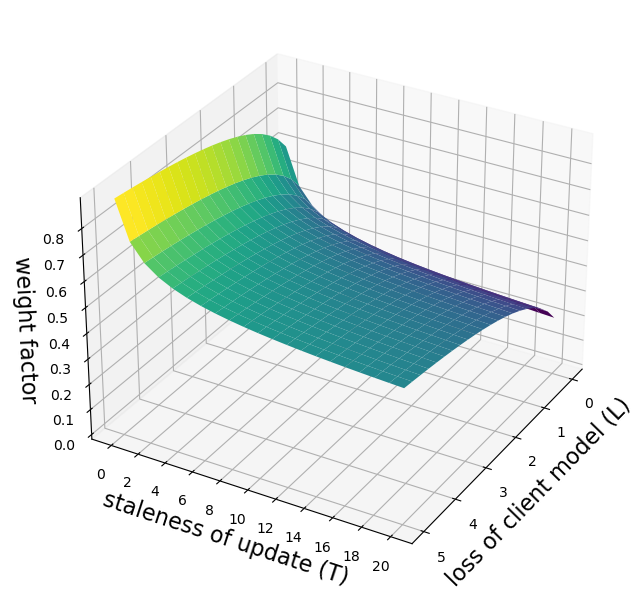

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(loss_vec, staleness_vec)
Z = weight_factor(scale=0.5, staleness=Y, a=0.5, loss=X, b=0.5)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('loss of client model (L)', fontsize=16)
ax.set_ylabel('staleness of update (T)', fontsize=16)
ax.set_zlabel('weight factor', fontsize=16)
ax.set_xticks(np.arange(0, 5.5, 1))
ax.set_yticks(np.arange(0, 21, 2))
ax.set_zticks(np.arange(0, 0.9, 0.1))
ax.view_init(30, 30)
fig.tight_layout()
# plt.title('IntelliAgg as a function of loss and staleness', fontsize=16)
plt.savefig('3d_plotB.pdf', dpi=300)
plt.show()

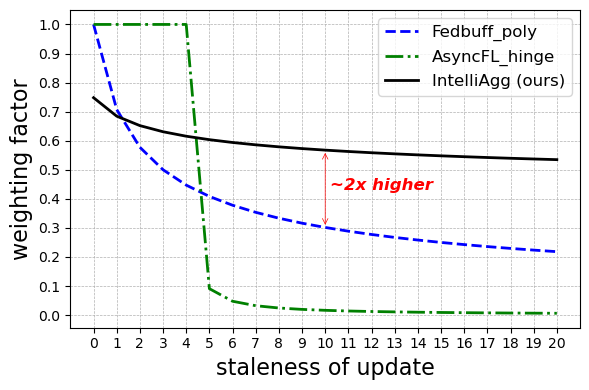

In [39]:
# plt.rcParams.update({
#     'axes.labelsize': 16,
#     'axes.titlesize': 16,
#     'xtick.labelsize': 15,
#     'ytick.labelsize': 15,
#     'figure.figsize': [6, 4]
# })

fig, ax = plt.subplots(figsize=(6, 4))

# exact values are: scale 0.4, a_exp 0.25 and b_exp 0.1
ax.plot(staleness_vec, fedbuff_polynomial(staleness_vec), label='Fedbuff_poly', color='b', linestyle='--', linewidth=2)
ax.plot(staleness_vec, fedbuff_hinge(staleness_vec, a=10,b=4), label='AsyncFL_hinge', color='g', linestyle='-.', linewidth=2)
ax.plot(staleness_vec, weight_factor(scale=0.4, staleness=staleness_vec, a=0.25, loss=1.3, b=0.1), label='IntelliAgg (ours)', color='k', linestyle='-', linewidth=2)

# ax.set_title('IntelliAgg vs AsyncFL weighting functions', fontsize=16)
ax.set_xlabel('staleness of update', fontsize=16)
ax.set_ylabel('weighting factor', fontsize=16)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)
fig.tight_layout()
ax.annotate("",
            xy=(10, 0.301), xycoords='data',
            xytext=(10, 0.5676), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3", color='r', lw=0.5),
            )
ax.text(10.2, 0.43, '~2x higher', fontsize=12, color='r', fontstyle='italic', fontweight='bold')
plt.savefig('weighting_functions.pdf', dpi=300)
plt.show()

In [105]:
weight_factor(scale=0.4, staleness=staleness_vec, a=0.25, loss=1.3, b=0.1)

array([0.74794993, 0.6843085 , 0.65188421, 0.63079265, 0.61544606,
       0.60352717, 0.59386519, 0.58579136, 0.57889004, 0.57288646,
       0.56759013, 0.56286392, 0.55860609, 0.55473919, 0.55120303,
       0.54794993, 0.54494156, 0.54214664, 0.53953938, 0.53709825,
       0.53480512])

In [70]:
fedbuff_hinge(staleness_vec, a=10,b=4)

[1,
 1,
 1,
 1,
 1.0,
 0.09090909090909091,
 0.047619047619047616,
 0.03225806451612903,
 0.024390243902439025,
 0.0196078431372549,
 0.01639344262295082,
 0.014084507042253521,
 0.012345679012345678,
 0.01098901098901099,
 0.009900990099009901,
 0.009009009009009009,
 0.008264462809917356,
 0.007633587786259542,
 0.0070921985815602835,
 0.006622516556291391,
 0.006211180124223602]

In [72]:
fedbuff_polynomial(staleness_vec)

array([1.        , 0.70710678, 0.57735027, 0.5       , 0.4472136 ,
       0.40824829, 0.37796447, 0.35355339, 0.33333333, 0.31622777,
       0.30151134, 0.28867513, 0.2773501 , 0.26726124, 0.25819889,
       0.25      , 0.24253563, 0.23570226, 0.22941573, 0.2236068 ,
       0.21821789])